Usando os dados dessa base de dados, você irá:
Importe os dados em notebook e atribua à variável chipo.
Selecione e mostre as 10 primeiras entradas.
Quantas observações estão presentes neste DataSet?
Qual o número de colunas neste DataSet?
Qual o nome de todas as colunas deste DataSet?
Qual o produto mais pedido? Quantas vezes ele foi pedido?
Qual foi o pedido mais pedido dentro da coluna choice_description?
Quantos itens foram pedidos no total?
Qual foi o valor recebido para o período representado nessa base de dados?
Qual a média do valor recebido por pedido?
Quantos itens diferentes estão esgotados? (não responder)
Quantos produtos custam mais de $10?
Qual o preço para cada um deles?
Ordene os itens que custam mais de $10 por ordem alfabética.
Quantas vezes o item mais caro foi pedido?
Quantas vezes uma Veggie Salad Bowl foi pedida?
Crie um histograma com os 5 produtos mais pedidos.
Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto.
Baseado no gráfico gerado, os dois eixos estão correlacionados? Justifique.



In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
url = ('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

In [265]:
chipo = pd.read_table(url) #  comando para arquivos separados por tabulação (tab-separated values)

In [266]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [267]:
chipo.shape[0] # shape diz o numero de linhas e o de colunas, então [0] vai indicar a linha = 4622 linhas

4622

In [268]:
chipo.info() # respostas 5 colunas, com seguintes nomes : order_id, quantity, item_name, choice_descripion, item_price.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [269]:
chipo # antes de começar a execução das respostas é preciso tratar os dados da tabela. 
#serão os passos seguintes

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [270]:
chipo[chipo.duplicated()] # verificando linhas duplicatas

,order_id,quantity,item_name,choice_description,item_price
238,103,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$11.75
248,108,1,Canned Soda,[Mountain Dew],$1.09
297,129,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, G...",$11.75
381,165,1,Canned Soft Drink,[Coke],$1.25
484,205,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75
567,233,1,Canned Soft Drink,[Diet Coke],$1.25
617,254,1,Chips,NaN,$2.15
684,282,1,Canned Soft Drink,[Coke],$1.25
773,319,1,Chicken Bowl,"[Tomatillo-Green Chili Salsa (Medium), Black B...",$8.49
908,376,1,Steak Burrito,"[Roasted Chili Corn Salsa (Medium), [Rice, Faj...",$8.99


In [271]:
chipo.drop_duplicates(inplace= True) # dropando as duplicatas

In [272]:
chipo[chipo.duplicated()] # confirmando que não tem mais duplicatas

,order_id,quantity,item_name,choice_description,item_price


In [273]:
chipo.isna().sum() # verificando nulos

order_id                 0
quantity                 0
item_name                0
choice_description    1228
item_price               0
dtype: int64

In [274]:
#tratando os nulos, poderiamos tratalos subtituindo por uma média, mas não será o caso nesse dataframe.

In [275]:
chipo.groupby('item_name')['quantity'].agg(total='sum').sort_values(by='total', ascending=False)
# Chicken Bowl = 752


,total
item_name,
Chicken Bowl,752
Chicken Burrito,584
Chips and Guacamole,501
Steak Burrito,383
Canned Soft Drink,340
Chips,227
Steak Bowl,220
Bottled Water,204
Chips and Fresh Tomato Salsa,130


In [276]:
chipo['choice_description'].value_counts().idxmax()
#o produto mais pedido na coluna descriçãi é o Diet Coke 


'[Diet Coke]'

In [277]:
chipo['quantity'].sum() # soma total da quantidade de pedido é 4913

4913

In [278]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:])) 
# Como vimos na info() o item_price é uma string e o apply aplica uma função a cada valor da coluna item_price, essa função é a lambda que substitui o 1 valor por um float

In [279]:
chipo['item_price'].sum() # agora sim podemos somar 

34177.25

In [280]:
chipo.info() # confirmando a mudança do dataframe para float

<class 'pandas.core.frame.DataFrame'>
Index: 4563 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4563 non-null   int64  
 1   quantity            4563 non-null   int64  
 2   item_name           4563 non-null   object 
 3   choice_description  3335 non-null   object 
 4   item_price          4563 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 213.9+ KB


In [281]:
chipo.groupby('order_id').sum()['item_price'].mean() # agrupa os pedido com o mesmo numero de ordem, soma ele, multiplica pelo preço e tira a média


18.635359869138494

In [282]:
chipo[chipo['item_price'] > 10].sort_values(by='item_name', ascending=True) # itens custam mais de 10 reais e mostrar os seus nomes em ordem alfabetica

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
3547,1426,1,Barbacoa Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",11.75
2762,1097,1,Barbacoa Bowl,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",11.75
4380,1748,1,Barbacoa Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.75
2749,1091,1,Barbacoa Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.75
...,...,...,...,...,...
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
3223,1289,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
3889,1559,2,Veggie Soft Tacos,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",16.98
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


In [283]:
len(chipo[chipo['item_price'] > 10].sort_values(by='item_name', ascending=True)) #quantos custam mais de 10

1123

In [284]:
chipo.loc[chipo['item_price'].idxmax(), 'item_name'] # localiza o preço mais caro e puxa o item_name correspondente

'Chips and Fresh Tomato Salsa'

In [285]:
chipo.loc[chipo['item_price'].idxmax()]['quantity'].sum() # o item mais acaro foi pedido 15 vezes

15

In [286]:
chipo[chipo['item_name'] == 'Veggie Salad Bowl']['item_name'].count()

18

In [287]:
chipo_mais= chipo.groupby('item_name')['quantity'].sum().sort_values(ascending= False).head(5)
chipo_mais

item_name
Chicken Bowl           752
Chicken Burrito        584
Chips and Guacamole    501
Steak Burrito          383
Canned Soft Drink      340
Name: quantity, dtype: int64

In [288]:
from matplotlib.pyplot import figure

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


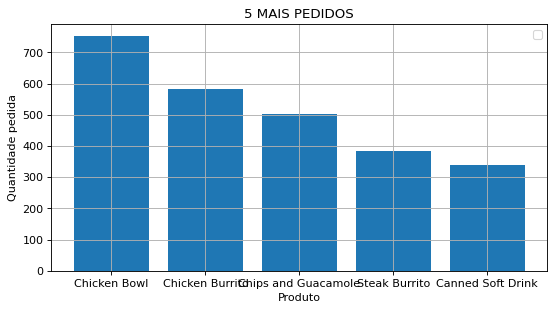

In [289]:
plt.figure(figsize=(8,4), dpi=80)
plt.bar(chipo_mais.index, chipo_mais.values)
plt.xlabel('Produto')
plt.ylabel('Quantidade pedida')
plt.title('5 MAIS PEDIDOS')
plt.legend()
plt.grid(True)
plt.show()

In [290]:
#Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto.
#Baseado no gráfico gerado, os dois eixos estão correlacionados? Justifique.

In [302]:
chipo.loc[chipo['item_price'].idxmax()] 

order_id                                      1443
quantity                                        15
item_name             Chips and Fresh Tomato Salsa
choice_description                             NaN
item_price                                   44.25
Name: 3598, dtype: object

In [341]:
pedido = chipo.loc[chipo['item_name']=='Chips and Fresh Tomato Salsa']

In [343]:
pedido

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
25,13,1,Chips and Fresh Tomato Salsa,NaN,2.39
55,25,1,Chips and Fresh Tomato Salsa,NaN,2.39
89,39,1,Chips and Fresh Tomato Salsa,NaN,2.95
183,82,1,Chips and Fresh Tomato Salsa,NaN,2.95
...,...,...,...,...,...
4231,1689,1,Chips and Fresh Tomato Salsa,NaN,2.95
4318,1722,1,Chips and Fresh Tomato Salsa,NaN,2.95
4324,1725,1,Chips and Fresh Tomato Salsa,NaN,2.95
4425,1764,1,Chips and Fresh Tomato Salsa,NaN,2.95


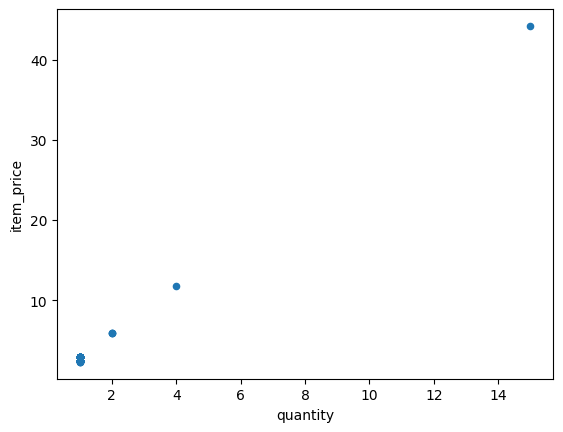

In [357]:
x = pedido.plot(kind='scatter',y='item_price',x='quantity') #pode plotar dessa forma

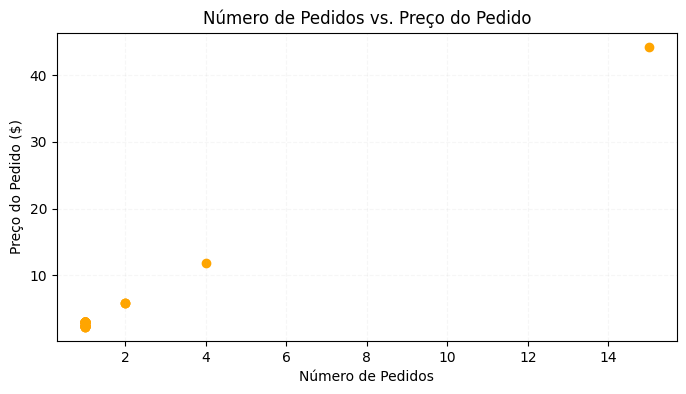

In [367]:
#ou dessa forma
plt.figure(figsize=(8, 4)) 
plt.scatter(pedido['quantity'], pedido['item_price'], color='orange', alpha=1)
plt.title('Número de Pedidos vs. Preço do Pedido')
plt.xlabel('Número de Pedidos')
plt.ylabel('Preço do Pedido ($)')
plt.grid(True, linestyle='--', alpha=0.1)
plt.show()

In [354]:
pedidos.corr() # é correlacionado a quantidade de pedido de 'Chips and Fresh Tomato Salsa' em relação o preço, pois deu 0,83, ou seja, quase 1.
#Logo tem uma relação linear como mostra no gráfico.

,quantity,item_price
quantity,1.000000,0.830775
item_price,0.830775,1.000000
